In [8]:
# %load matplot.py
# %%
import matplotlib.pyplot as plt
plt.rc('font', family = 'gulim')
plt.rc('axes', unicode_minus=False)




In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
sns.set_style('darkgrid')

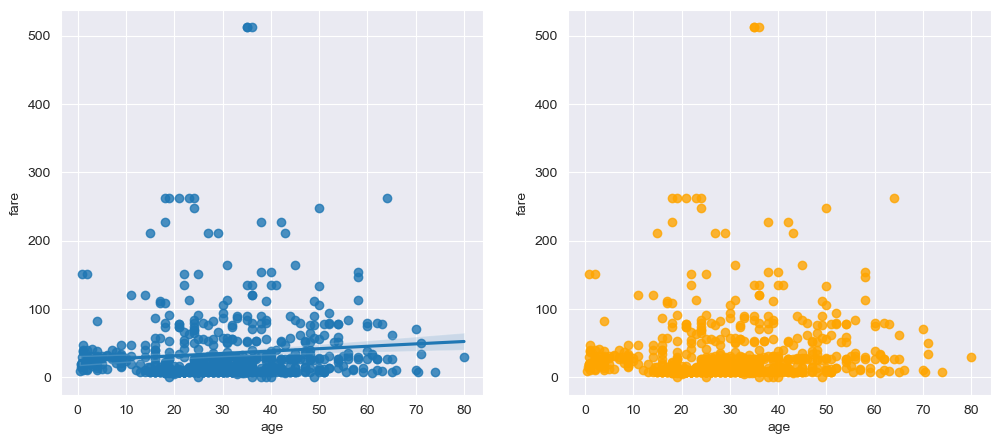

In [20]:
# titanic[['age','fare']] -> 연령별 요금 상황
# titanic[['age','fare']]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시 (fit_reg=True)
sns.regplot(x='age',y='fare',data=titanic, ax=ax1)
sns.regplot(x='age',y='fare',data=titanic, ax=ax2, fit_reg=False, color='orange')

plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'titanic fare -- hist/kde')

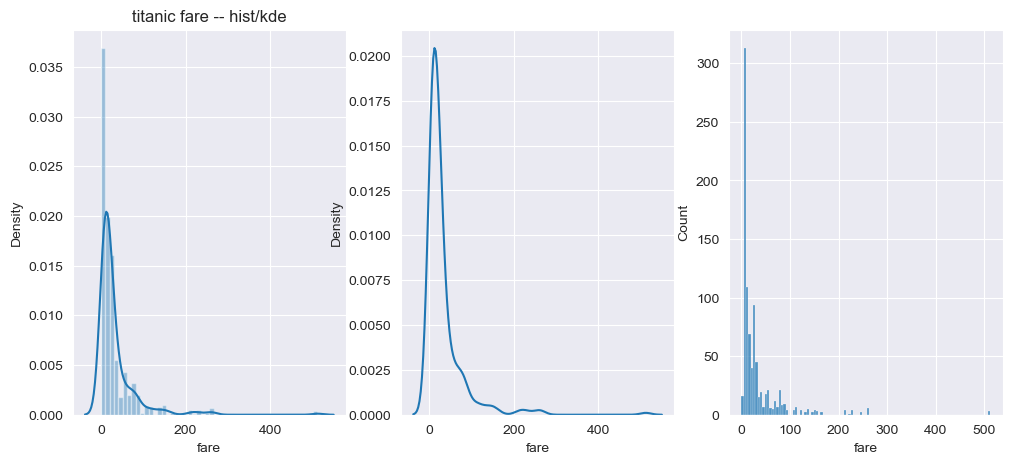

In [33]:
# 히스토그램/커널 밀도 그래프 -> 하나의 변수 데이터의 분포를 확인
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot()
# sns.displot(x='fare', data=titanic, ax=ax2)
sns.distplot(titanic['fare'], ax=ax1)

# kdeolot()
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplot()
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare -- hist/kde')

In [51]:
# heatmap 히트맵 -> 데이터 프레임을 피벗테이블로 정리하고자 할 때
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


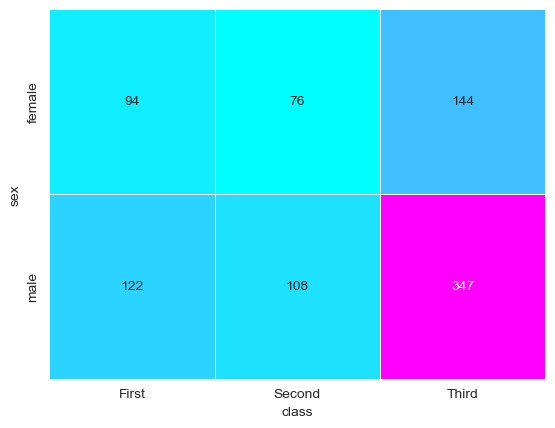

In [54]:
# 히트맵 그리기
sns.heatmap(table, annot=True, fmt='d', cmap='cool', linewidths=.5, cbar=False)

plt.show()

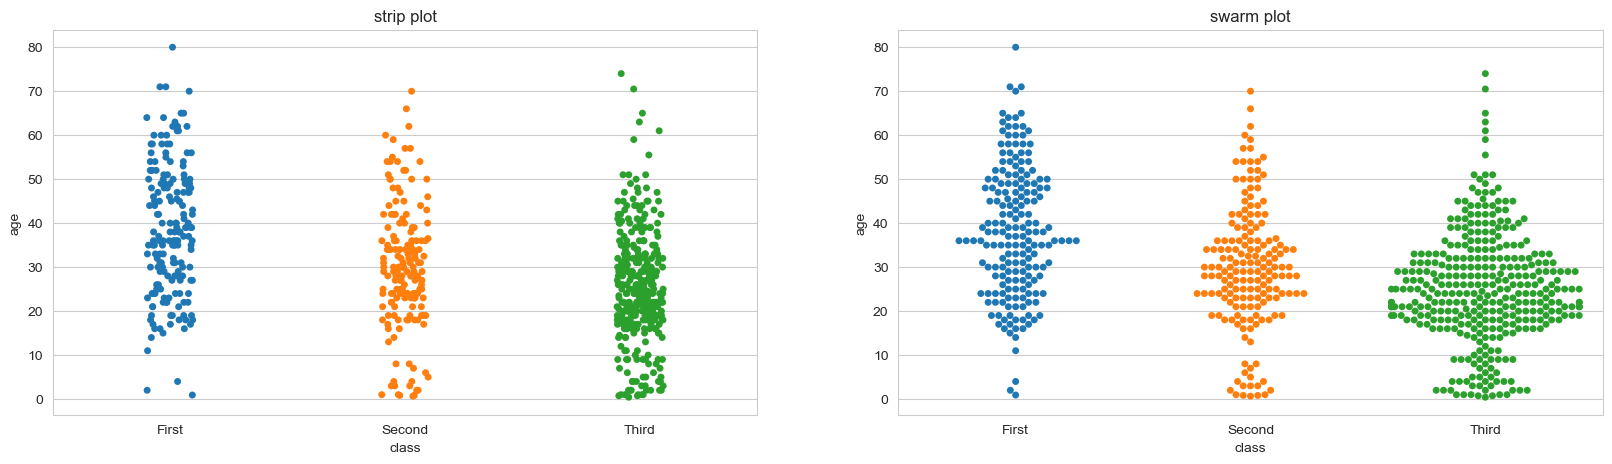

In [59]:
# 범주형 데이터의 산점도 -> stripplot(), swarmplot() : 데이터의 분산 정도도 표현
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터의 분산 미 고려
sns.stripplot(x='class', y='age', data=titanic, ax=ax1)

# 이산형 변수의 분포 - 데이터의 분산고려
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)

ax1.set_title('strip plot')
ax2.set_title('swarm plot')
plt.show()

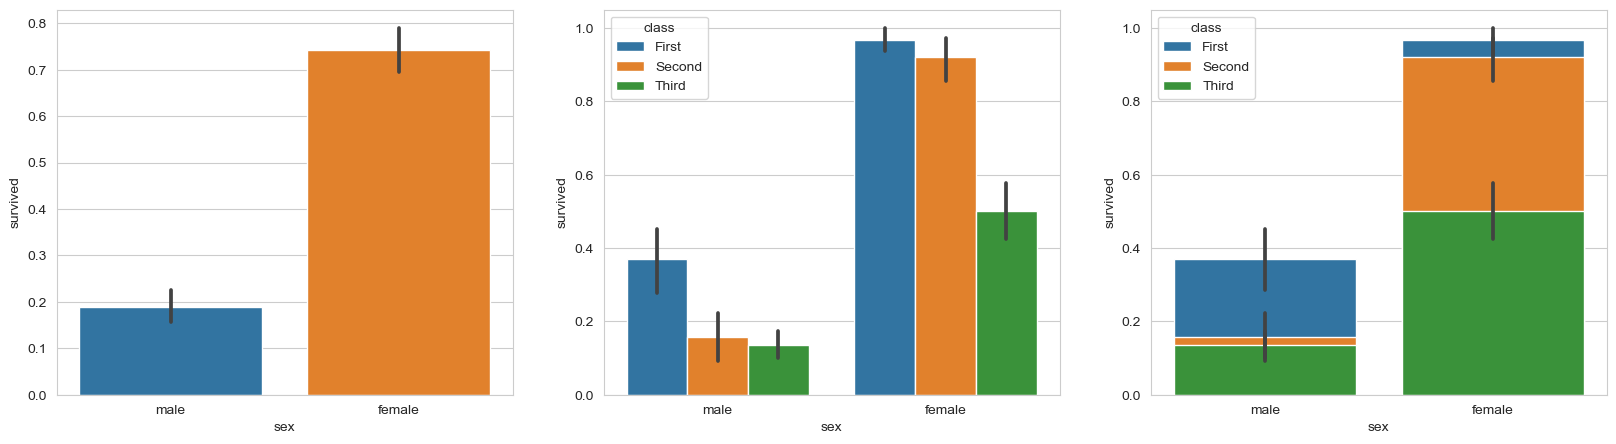

In [64]:
# 막대 그래프 -> barplot

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축 y축 설정
sns.barplot(x='sex',y='survived', data=titanic, ax=ax1)

# hue 변수 설정
sns.barplot(x='sex',y='survived', hue='class', data=titanic, ax=ax2)

# 누적
sns.barplot(x='sex',y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

plt.show()

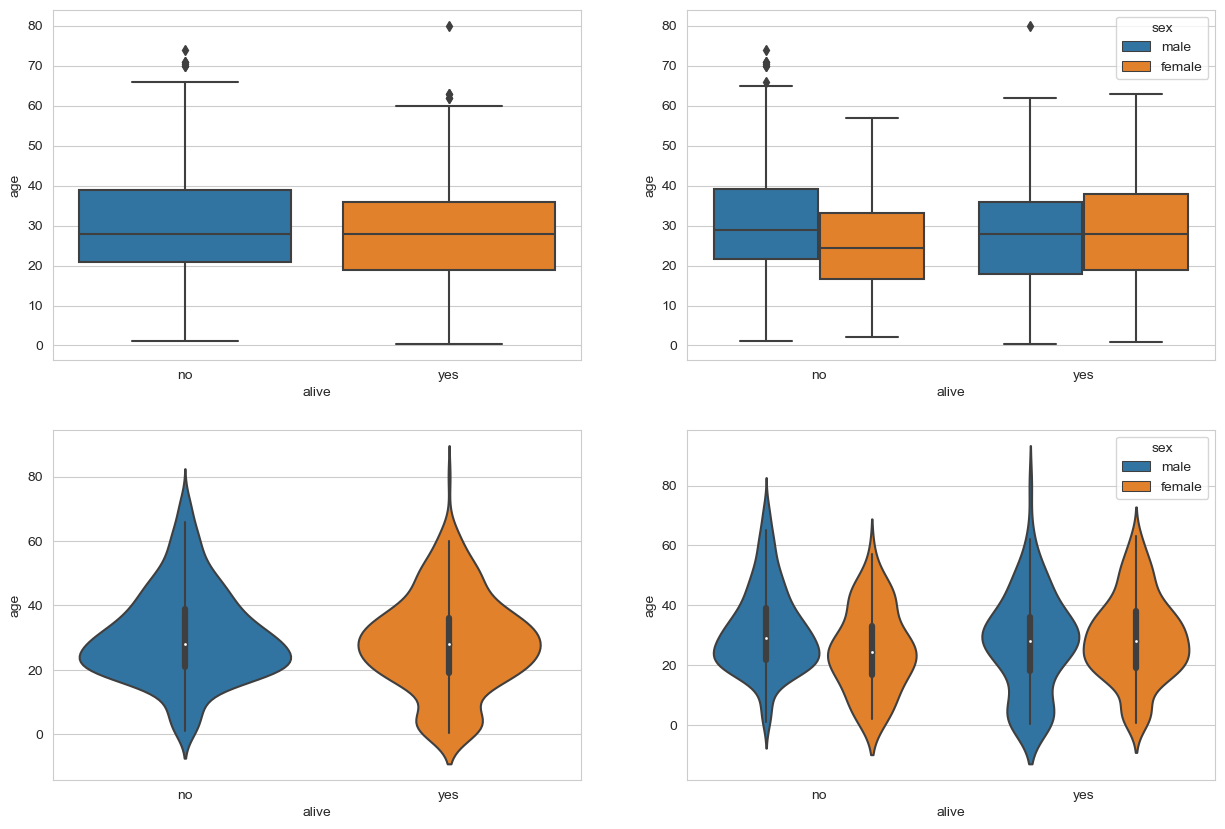

In [70]:
# 박스 플롯/바이올린 그래프
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 기본값
sns.boxplot(x='alive',y='age',data=titanic, ax=ax1)

# hue 추가
sns.boxplot(x='alive',y='age',hue='sex', data=titanic, ax=ax2)

# 바이올린 플롯 기본값
sns.violinplot(x='alive',y='age',data=titanic, ax=ax3)

# hue 추가
sns.violinplot(x='alive',y='age',hue='sex',data=titanic, ax=ax4)
plt.show()


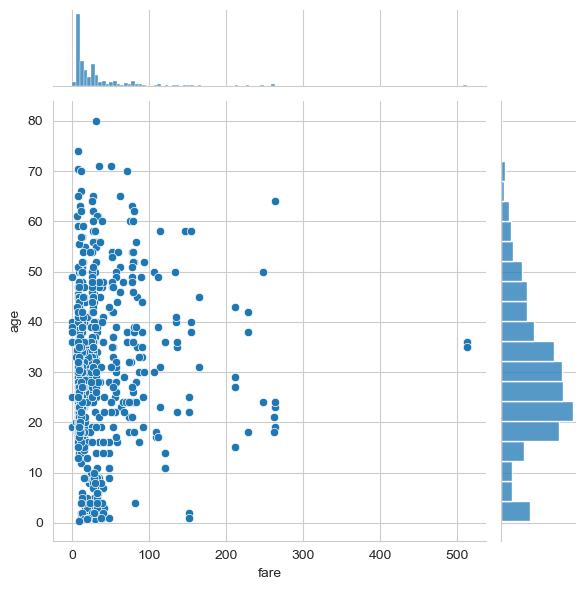

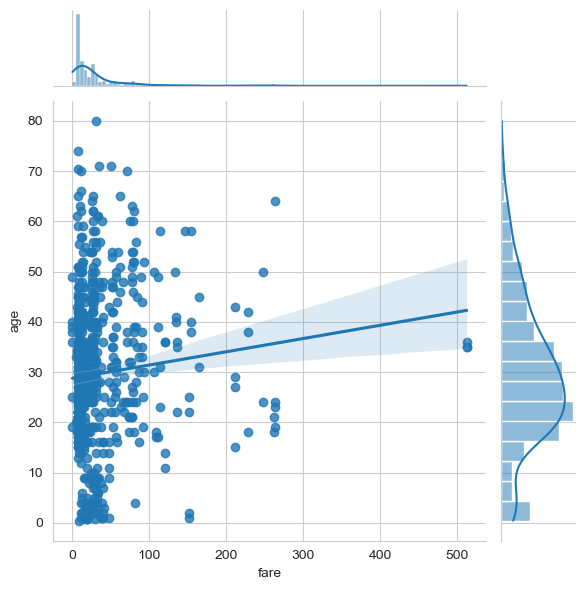

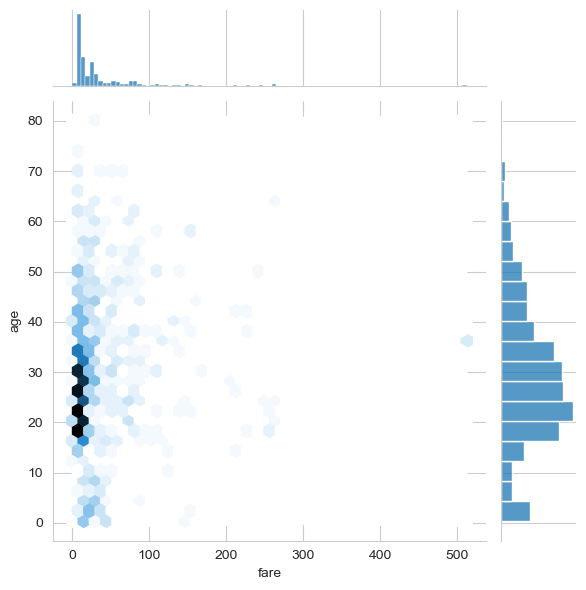

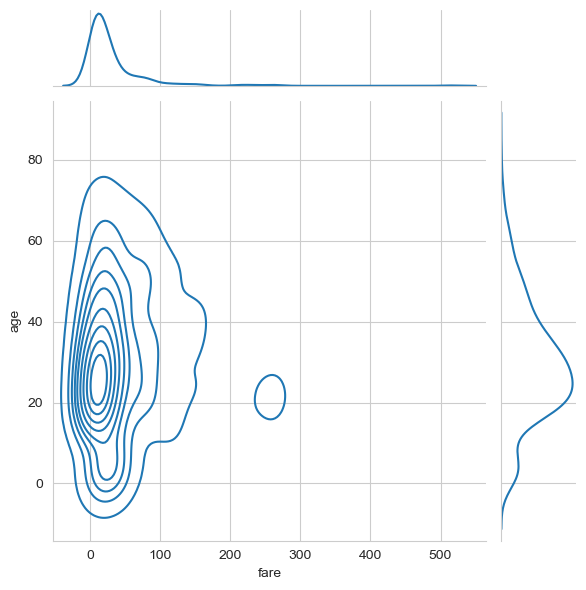

In [73]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare',y='age',data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare',y='age',kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare',y='age',kind='hex', data=titanic)

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare',y='age',kind='kde', data=titanic)

plt.show()

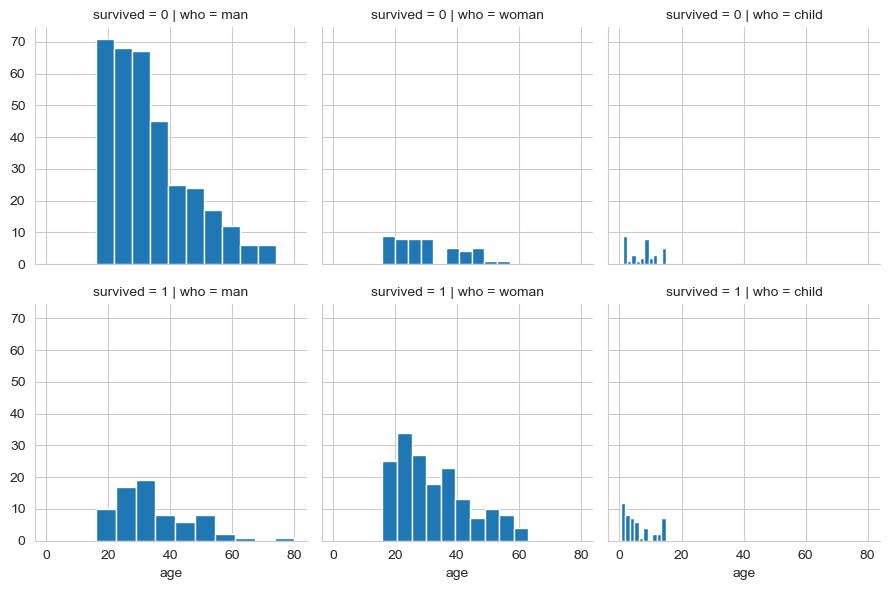

In [75]:
# 조건에 맞게 화면 분할

g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age')

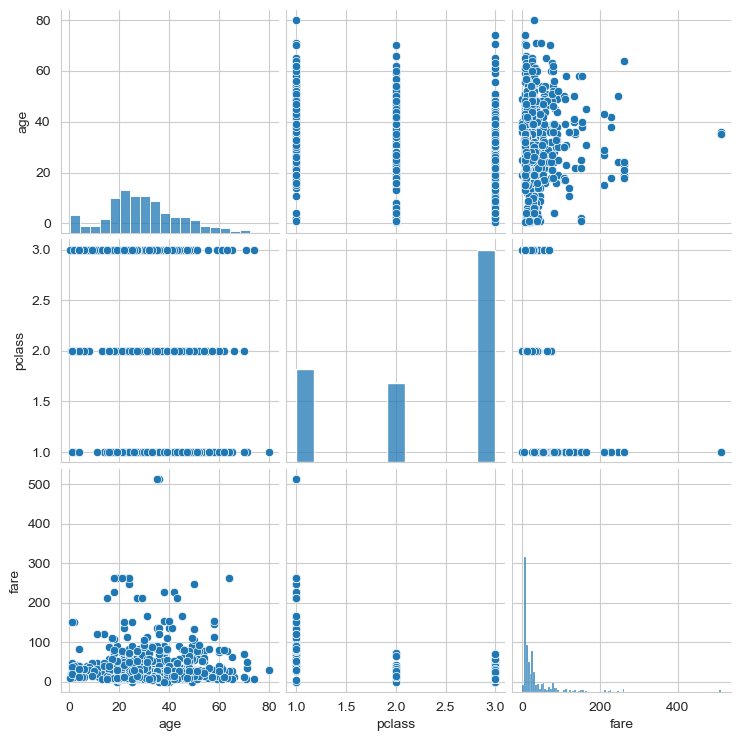

In [76]:
# 이변수 데이터의 분포
titanic_pair = titanic[['age','pclass','fare']]

g = sns.pairplot(titanic_pair)